# **1. Perkenalan Dataset**


Dataset yang digunakan merupakan dataset Customer Shopping (Latest Trends) yang bersumber dari Kaggle : https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data

Columns
- Customer ID: Nomor identifikasi unik untuk setiap pelanggan
- Age: Usia pelanggan
- Gender: Jenis kelamin pelanggan
- Item Purchased: Barang yang dibeli
- Category: Kategori produk
- Purchase Amount (USD): Jumlah pembelian dalam Dollar Amerika
- Location: Lokasi/negara bagian pelanggan
- Size: Ukuran produk (S/M/L/XL dll)
- Color: Warna produk
- Season: Musim saat pembelian dilakukan
- Review Rating: Peringkat ulasan produk (skala 1-5)
- Subscription Status: Status berlangganan pelanggan (Ya/Tidak)
- Payment Method: Metode pembayaran yang digunakan
- Shipping Type: Jenis pengiriman
- Discount Applied: Apakah diskon diterapkan (Ya/Tidak)
- Promo Code Used: Apakah kode promo digunakan (Ya/Tidak)
- Previous Purchases: Jumlah pembelian sebelumnya
- Preferred Payment Method: Metode pembayaran yang disukai
- Frequency of Purchases: Frekuensi pembelian

# **2. Import Library**

Berikut library yang digunakan dalam project ini :

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Loading data dan menampilkan 5 data teratas :

In [2]:
file_path = './data/shopping_trends.csv'
shopping_data = pd.read_csv(file_path)
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **4. Exploratory Data Analysis (EDA)**

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
print(f"Jumlah baris dan kolom: {shopping_data.shape}")

Jumlah baris dan kolom: (3900, 19)


- Menampilkan Informasi terkait dataset. Seperti tipe data kolom.

In [4]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

- Menampilkan dan menjelaskan statistik untuk data numerikal

In [5]:
shopping_data.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


- Menampilkan dan menjelaskan statistik deskriptif untuk data kategorikal (bertipe object)

In [6]:
shopping_data.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

- Mengecek data yang hilang/kosong

In [7]:
shopping_data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot

- Menampilkan distribusi variabel numerik dengan histogram

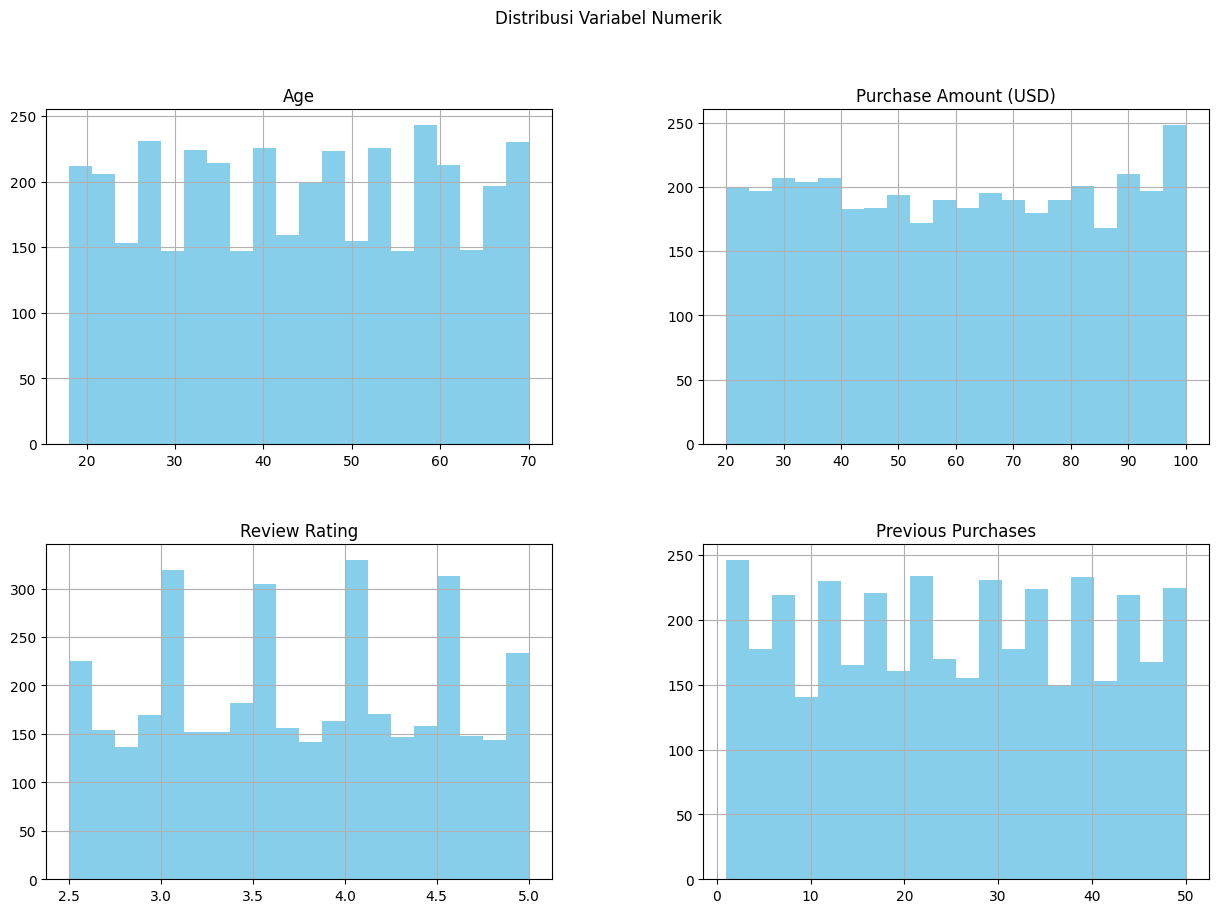

In [8]:
# Drop kolom Customer ID karena tidak relevan dan hanya mngambil kolom numerikal
numerical_data = shopping_data.drop(columns=['Customer ID']).select_dtypes(include=['float64', 'int64'])

numerical_data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

- Menampilkan heatmap korelasi antar data numerikal

                         Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000                 -0.010         -0.022   
Purchase Amount (USD) -0.010                  1.000          0.031   
Review Rating         -0.022                  0.031          1.000   
Previous Purchases     0.040                  0.008          0.004   

                       Previous Purchases  
Age                                 0.040  
Purchase Amount (USD)               0.008  
Review Rating                       0.004  
Previous Purchases                  1.000  


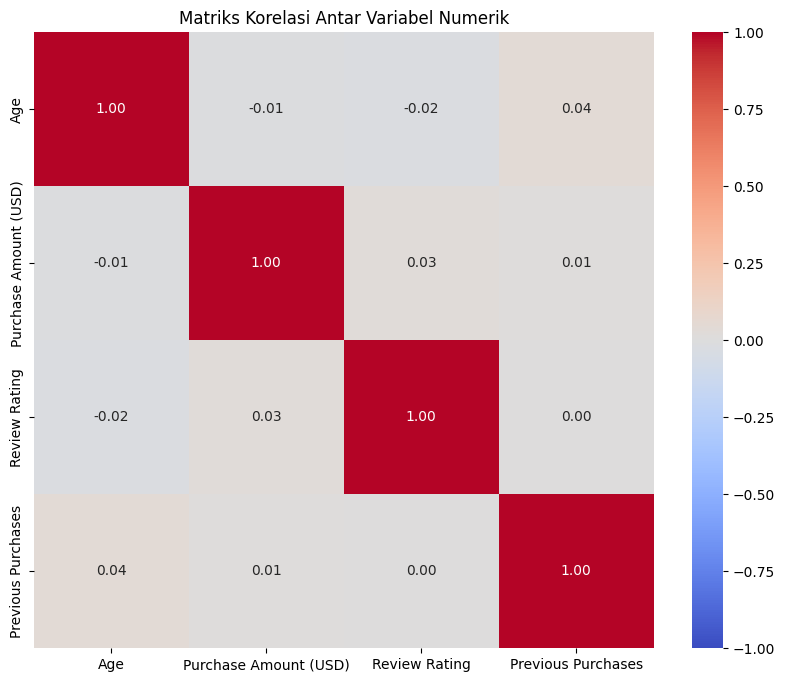

In [9]:
# Korelasi antar variabel numerik
corr_matrix = numerical_data.corr()

# Print data
print(corr_matrix.round(3))

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

- Menampilkan distribusi dan diagram batang variabel kategorikal

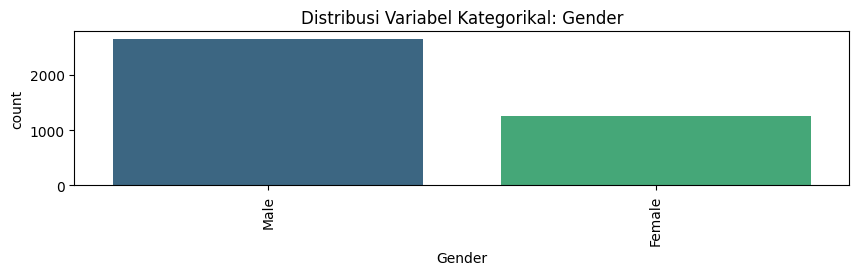

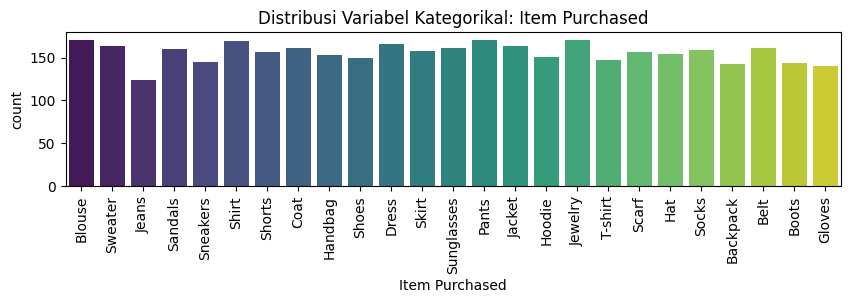

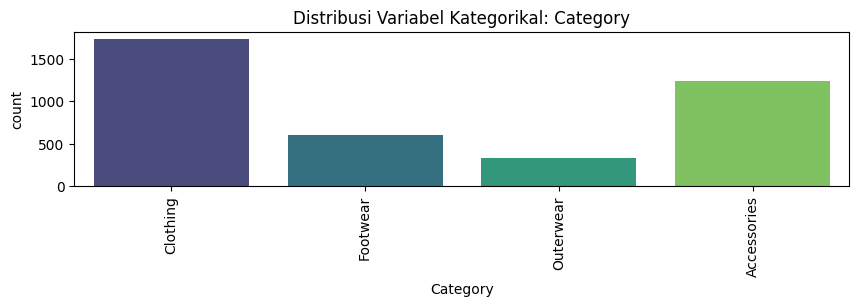

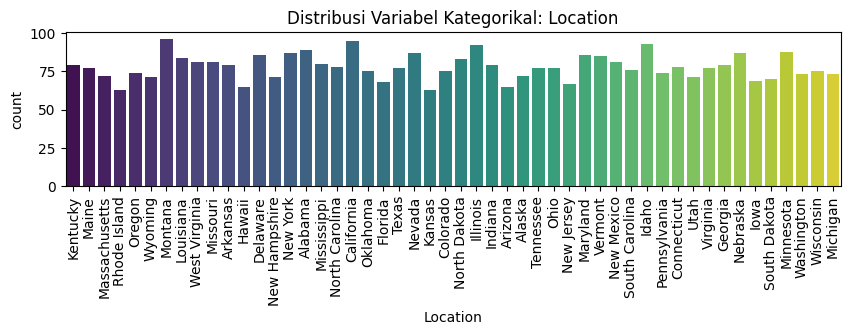

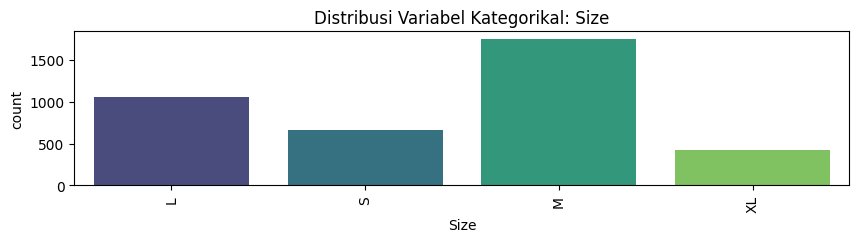

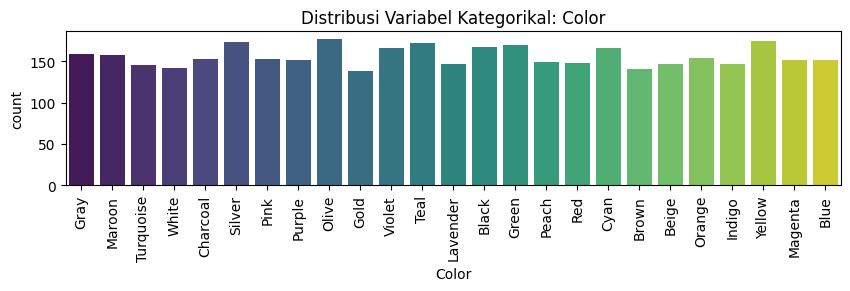

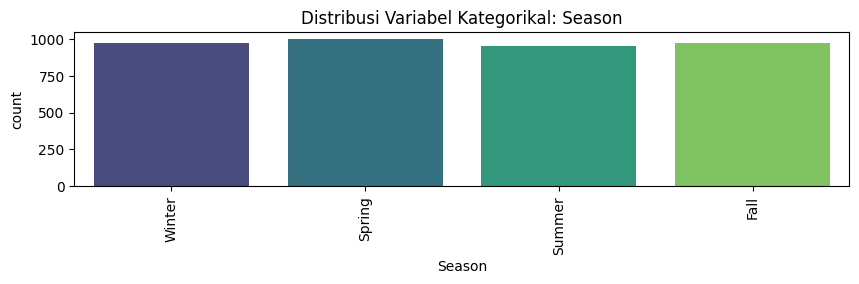

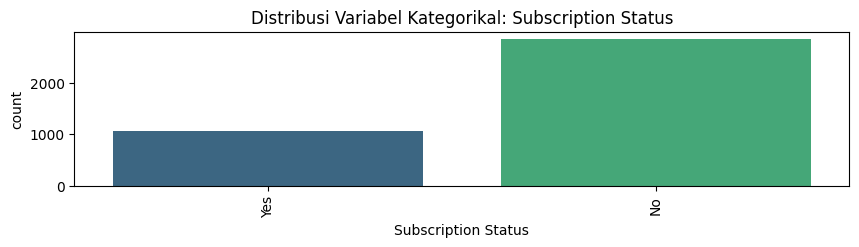

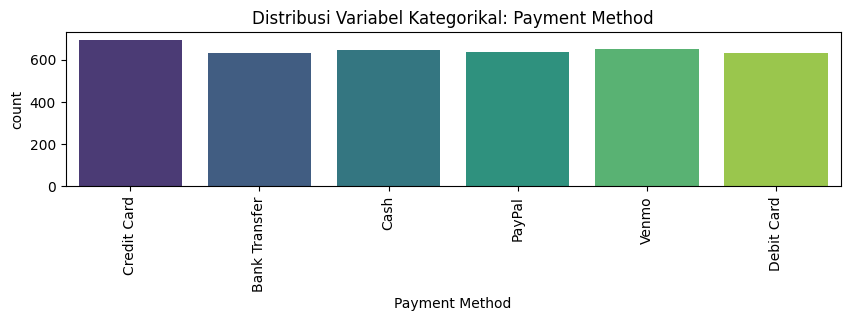

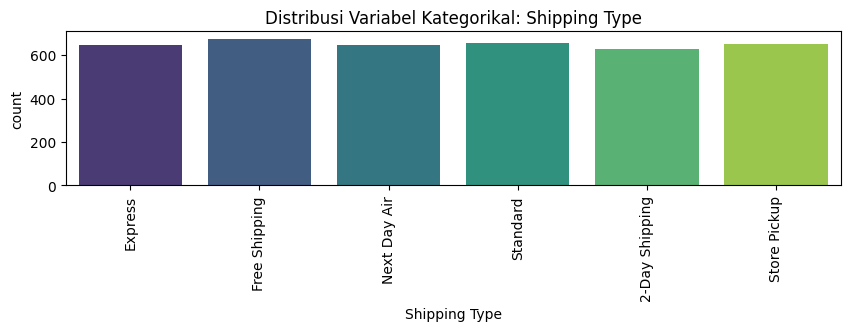

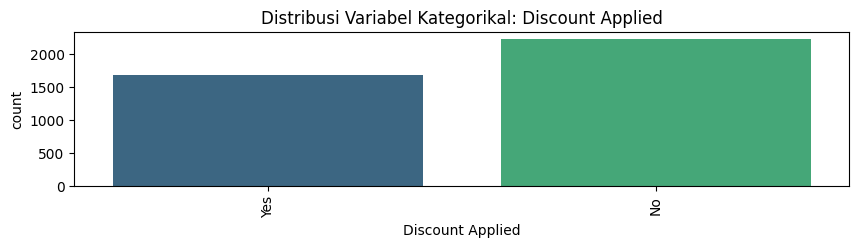

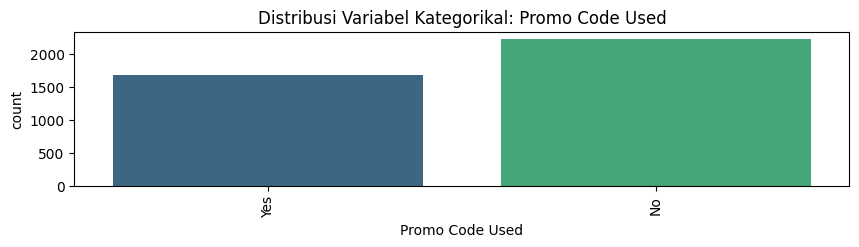

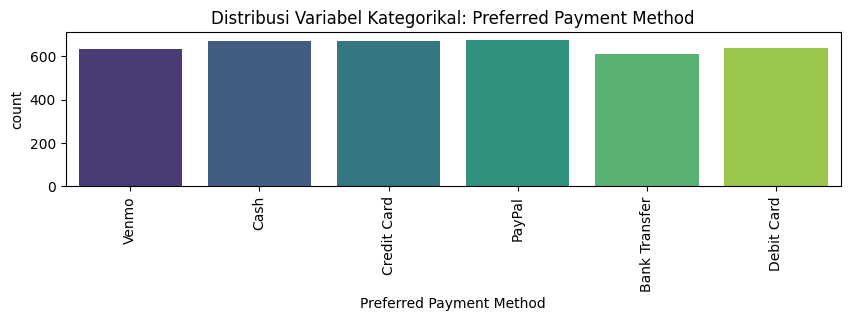

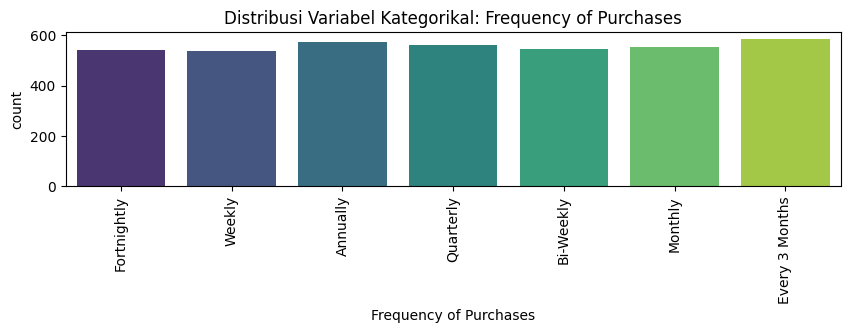

In [10]:
categorical_cols = shopping_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=shopping_data, x=col, palette='viridis', hue=col)
    plt.title(f"Distribusi Variabel Kategorikal: {col}")
    plt.xticks(rotation=90)
    plt.show()


- Menampilkan pairplot untuk hubungan antar variabel kategorikal dan numerikal

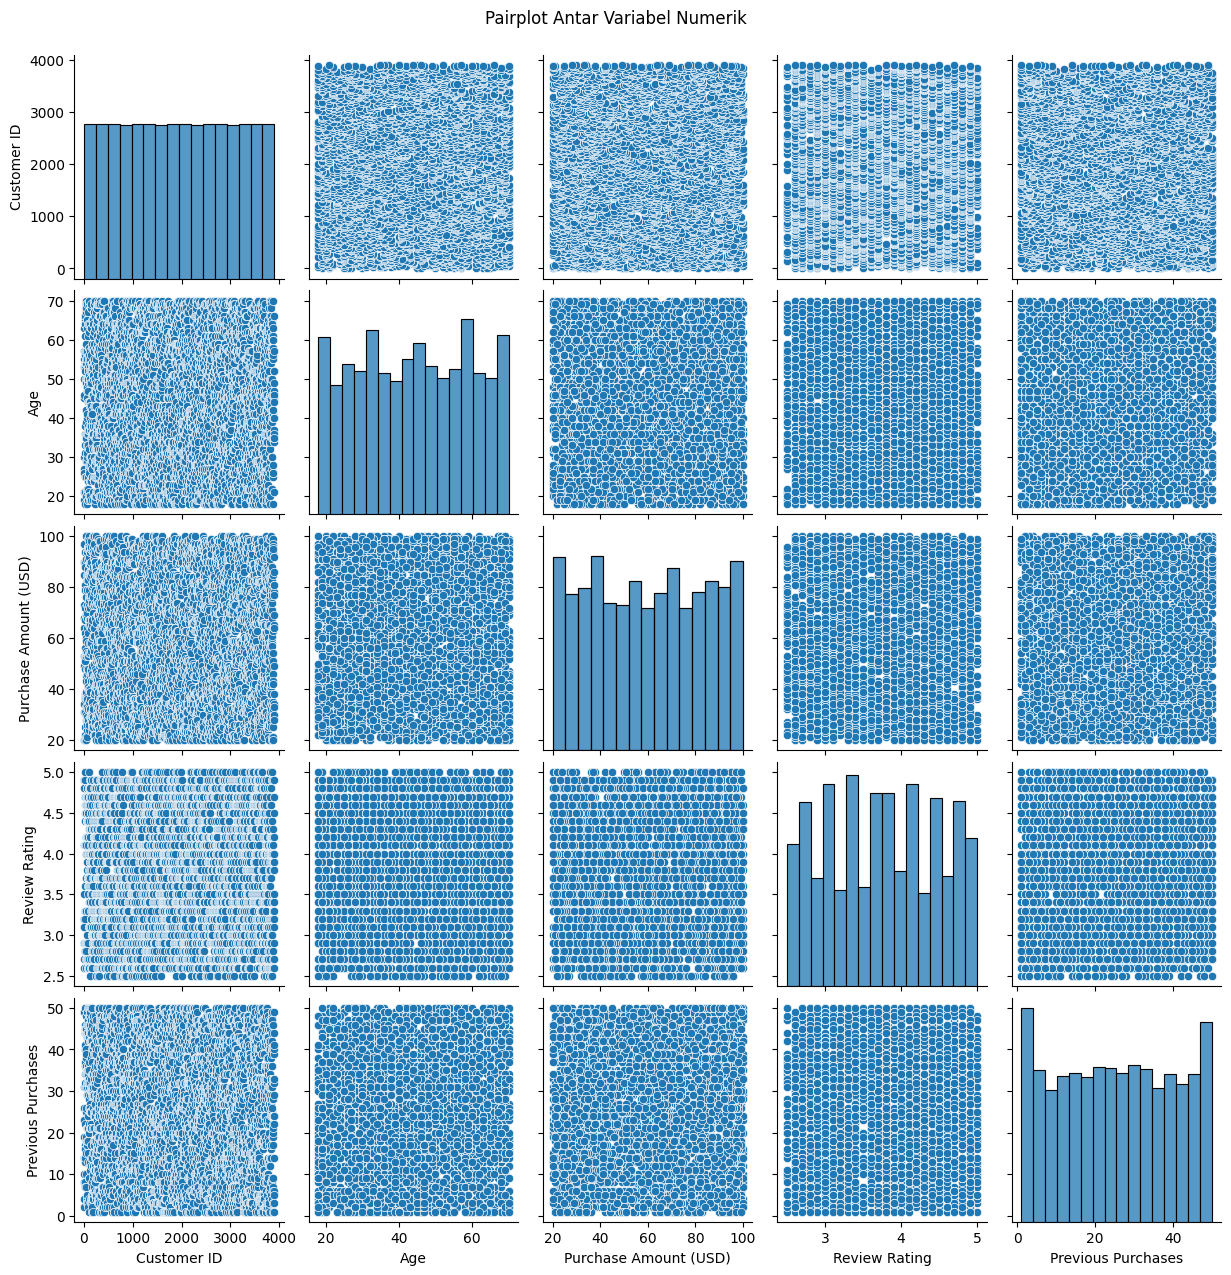

In [11]:
# Pairplot untuk hubungan antar variabel numerikal
sns.pairplot(shopping_data.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot Antar Variabel Numerik", y=1.02)
plt.show()

# **5. Data Preprocessing**

1. Menghapus atau Menangani Data Kosong (Missing Values)

Tidak terdapat data kosong, sehingga tidak perlu dilakukan

2. Menghapus Data Duplikat

In [12]:
print(shopping_data.duplicated().sum())
shopping_data = shopping_data.drop_duplicates()

0


3. Deteksi dan Penanganan Outlier

Dari describe data sebelumnya, datanya cukup bersih dan tidak terdapat outlier

4. Menghapus Kolom yang tidak digunakan

 Kolom `Customer ID` sebaiknya dibuang karena hanya sebagai id

In [13]:

shopping_data = shopping_data.drop(columns=['Customer ID'])

5. Encoding Data Kategorikal

- Label encoding untuk kolom `size`, `gender`, `season` dan data Yes/No

In [14]:
pd.set_option('future.no_silent_downcasting', True)

# Gender MApping
gender_mapping = {
    'Male': 0,
    'Female': 1
}
shopping_data['Gender'] = shopping_data['Gender'].replace(gender_mapping).infer_objects(copy=False)


# Size MApping
size_mapping = {
    'S': 0,
    'M': 1,
    'L': 2,
    'XL': 3
}
shopping_data['Size'] = shopping_data['Size'].replace(size_mapping).infer_objects(copy=False)

# Season MApping
season_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Fall': 2,
    'Winter': 3
}
shopping_data['Season'] = shopping_data['Season'].replace(season_mapping).infer_objects(copy=False)


# Yes No MApping
yes_no_mapping = {
    'No': 0,
    'Yes': 1
}
shopping_data['Subscription Status'] = shopping_data['Subscription Status'].replace(yes_no_mapping).infer_objects(copy=False)
shopping_data['Discount Applied'] = shopping_data['Discount Applied'].replace(yes_no_mapping).infer_objects(copy=False)
shopping_data['Promo Code Used'] = shopping_data['Promo Code Used'].replace(yes_no_mapping).infer_objects(copy=False)

- Label Encoding untuk data Kategorikal Lainnya

In [15]:

le = LabelEncoder()
shopping_data['Item Purchased'] = le.fit_transform(shopping_data['Item Purchased'])
shopping_data['Category'] = le.fit_transform(shopping_data['Category']) 
shopping_data['Location'] = le.fit_transform(shopping_data['Location']) 
shopping_data['Color'] = le.fit_transform(shopping_data['Color']) 
shopping_data['Payment Method'] = le.fit_transform(shopping_data['Payment Method']) 
shopping_data['Shipping Type'] = le.fit_transform(shopping_data['Shipping Type']) 
shopping_data['Preferred Payment Method'] = le.fit_transform(shopping_data['Preferred Payment Method']) 
shopping_data['Frequency of Purchases'] = le.fit_transform(shopping_data['Frequency of Purchases']) 

In [16]:
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,0,2,1,53,16,2,7,3,3.1,1,2,1,1,1,14,5,3
1,19,0,23,1,64,18,2,12,3,3.1,1,0,1,1,1,2,1,3
2,50,0,11,1,73,20,0,12,0,3.1,1,1,2,1,1,23,2,6
3,21,0,14,2,90,38,1,12,0,3.5,1,4,3,1,1,49,4,6
4,45,0,2,1,49,36,1,21,0,2.7,1,1,2,1,1,31,4,0


In [17]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   int64  
 2   Item Purchased            3900 non-null   int64  
 3   Category                  3900 non-null   int64  
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   int64  
 6   Size                      3900 non-null   int64  
 7   Color                     3900 non-null   int64  
 8   Season                    3900 non-null   int64  
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   int64  
 11  Payment Method            3900 non-null   int64  
 12  Shipping Type             3900 non-null   int64  
 13  Discount Applied          3900 non-null   int64  
 14  Promo Co

6. Normalisasi atau Standarisasi Fitur

In [18]:
# Pilih fitur numerik yang perlu distandarisasi
numerical_cols = shopping_data.select_dtypes(include=['float64', 'int64']).columns

# Standarisasi fitur numerik
scaler = StandardScaler()
shopping_data[numerical_cols] = scaler.fit_transform(shopping_data[numerical_cols])

shopping_data.describe()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3.900000e+03,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3900.000000,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03
mean,-1.985876e-16,0.000000,6.923237e-17,1.667043e-16,-1.166019e-16,-4.372571e-17,-3.552714e-17,-1.293552e-16,8.198570e-17,4.463666e-16,5.830094e-17,-1.097697e-16,-1.056705e-16,0.000000,0.000000,7.287618e-17,-2.368476e-17,-2.550666e-17
std,1.000128e+00,1.000128,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128,1.000128,1.000128e+00,1.000128e+00,1.000128e+00
min,-1.714394e+00,-0.685994,-1.671990e+00,-1.117360e+00,-1.679071e+00,-1.692046e+00,-1.496910e+00,-1.677060e+00,-1.328897e+00,-1.745419e+00,-6.081636e-01,-1.472409e+00,-1.481324e+00,-0.868554,-0.868554,-1.685779e+00,-1.486198e+00,-1.488699e+00
25%,-8.594483e-01,-0.685994,-8.384529e-01,-1.117360e+00,-8.767861e-01,-8.553111e-01,-3.628874e-01,-8.461114e-01,-1.328897e+00,-9.075836e-01,-6.081636e-01,-8.838074e-01,-8.921780e-01,-0.868554,-0.868554,-8.550575e-01,-8.946310e-01,-9.882745e-01
50%,-4.502378e-03,-0.685994,-4.915732e-03,-2.001925e-03,9.950067e-03,-1.857623e-02,-3.628874e-01,-1.516303e-02,-4.380928e-01,-6.974802e-02,-6.081636e-01,-2.952061e-01,2.861133e-01,-0.868554,-0.868554,-2.433588e-02,-3.030642e-01,1.257477e-02
75%,8.504436e-01,1.457738,8.286215e-01,-2.001925e-03,8.966862e-01,8.181586e-01,7.711357e-01,8.157853e-01,4.527111e-01,9.077268e-01,1.644294e+00,8.819963e-01,8.752589e-01,1.151339,1.151339,8.756125e-01,8.800693e-01,1.013424e+00
max,1.705390e+00,1.457738,1.662159e+00,2.228715e+00,1.698971e+00,1.724621e+00,1.905159e+00,1.646734e+00,1.343515e+00,1.745562e+00,1.644294e+00,1.470597e+00,1.464405e+00,1.151339,1.151339,1.706334e+00,1.471636e+00,1.513849e+00


**Insight** 

- Nilai minimum dan maksimum untuk setiap kolom sekarang berada dalam rentang yang lebih konsisten dan tidak terlalu besar atau kecil
- Setelah standarisasi, nilai rata-rata (mean) untuk semua fitur numerik seharusnya mendekati 0

7. Binning (Pengelompokan Data)

Binning tidak dilakukan karena data numerikal telah dilakukan normalisasi dan standarisasi sebelumnya

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Algoritma yang digunakan KMeans, dan jumlah cluster awal dicoba di angka 5

In [19]:
# Tentukan jumlah cluster awal (n_clusters)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
shopping_data['Cluster_initial'] = kmeans.fit_predict(shopping_data)

print("Cluster labels:")
print(shopping_data['Cluster_initial'].value_counts())

Cluster labels:
Cluster_initial
4    1243
2    1053
0     624
1     534
3     446
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

- Mengguinakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
- Menghitung Silhouette Score sebagai ukuran kualitas cluster.

[63895.90147100542, 58767.759331902285, 56622.41469990181, 55592.36917461885, 54756.57949202345, 51966.25095777298, 51589.12036130394, 50692.74209441026]


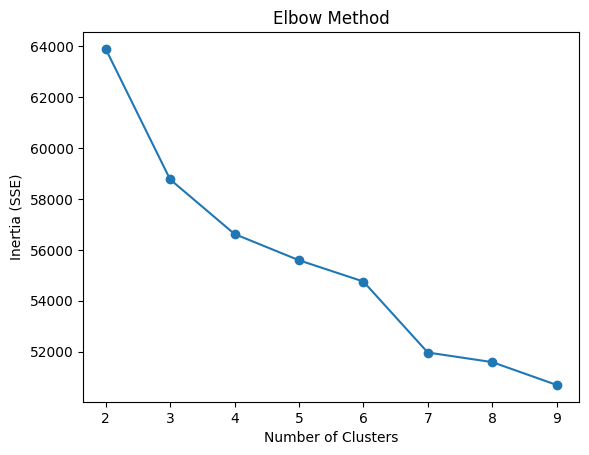

Silhouette Score for 2 clusters: 0.1718

Silhouette Score for 3 clusters: 0.1574

Silhouette Score for 4 clusters: 0.1027

Silhouette Score for 5 clusters: 0.0879

Silhouette Score for 6 clusters: 0.0553

Silhouette Score for 7 clusters: 0.0771

Silhouette Score for 8 clusters: 0.0848

Silhouette Score for 9 clusters: 0.0668



In [20]:
# Evaluasi menggunakan Elbow Method
inertia = []
range_clusters = range(2, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(shopping_data)
    inertia.append(kmeans.inertia_)
print(inertia)
# Plot Elbow Curve
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()

# Evaluasi menggunakan Silhouette Score
for k in range_clusters:
    best_k = k
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    labels = kmeans.fit_predict(shopping_data)
    silhouette_avg = silhouette_score(shopping_data, labels)
    print(f"Silhouette Score for {best_k} clusters: {silhouette_avg:.4f}\n")



**Insight**
- Nilai inertia menurun secara signifikan dari k=2 (63895.90) ke k=3 (58767.76)
- Setelah k=3, penurunan nilai inertia menjadi lebih landai
- Silhouette score tertinggi didapatkan pada k=2 clusters (0.1718)
- Nilai score cenderung menurun seiring bertambahnya jumlah cluster

## **c. Feature Selection**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

- Melakukan feature selection untuk optimasi model clustering
- Meanmpilkan Korelasi untuk melihat data korelasi antar kolom

Cluster_initial             1.000000
Gender                      0.808533
Purchase Amount (USD)       0.064266
Review Rating               0.060279
Color                       0.000445
Preferred Payment Method   -0.007485
Location                   -0.008101
Size                       -0.015326
Category                   -0.015681
Season                     -0.020999
Payment Method             -0.021642
Previous Purchases         -0.042682
Item Purchased             -0.047893
Frequency of Purchases     -0.054202
Shipping Type              -0.065321
Age                        -0.081999
Subscription Status        -0.124367
Promo Code Used            -0.625875
Discount Applied           -0.625875
Name: Cluster_initial, dtype: float64


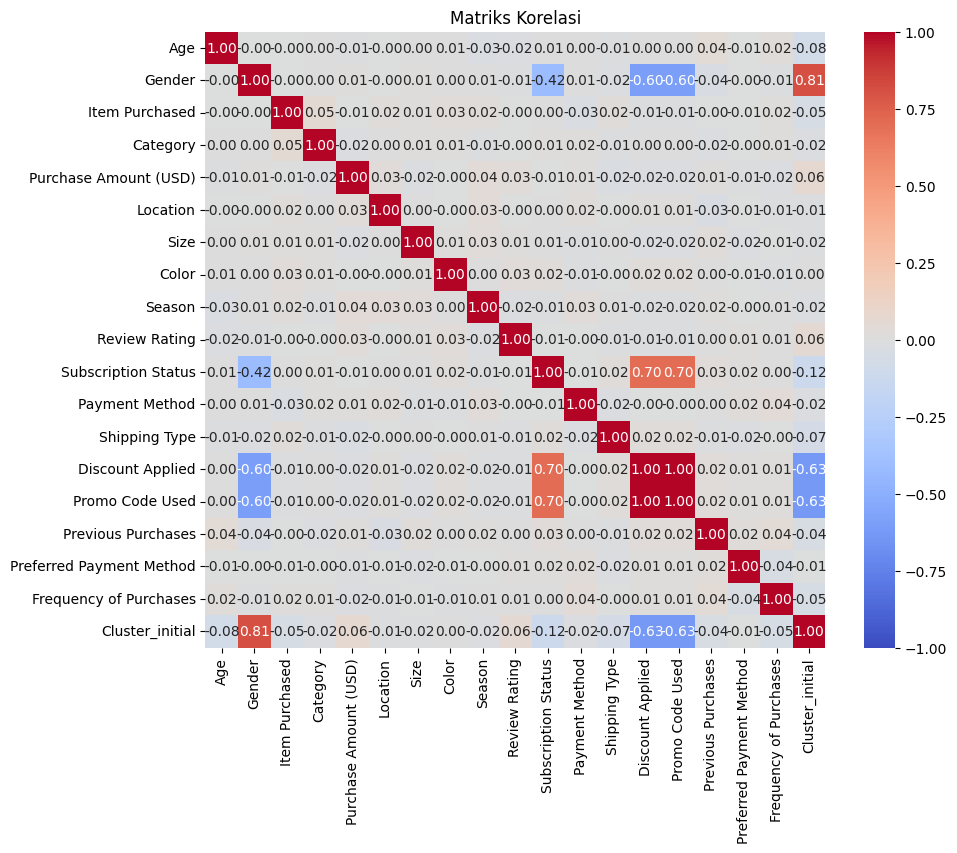

In [21]:
# Seleksi fitur berdasarkan korelasi
correlation = shopping_data.corr()
print(correlation['Cluster_initial'].sort_values(ascending=False))

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriks Korelasi")
plt.show()


- Pilih feature berdasarkan korelasi yang signifikan, selanjutnya hitung silhoutte score nya

In [22]:
# Pilih fitur dengan korelasi signifikan
selected_features = ['Discount Applied', 'Promo Code Used', 'Subscription Status', 'Gender', 'Size' ]
shopping_data_reduced = shopping_data[selected_features]

for k in range(2, 10):  # Misalnya coba k = 2 sampai 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(shopping_data_reduced)
    silhouette_avg = silhouette_score(shopping_data_reduced, labels)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 2 clusters: 0.5427
Silhouette Score for 3 clusters: 0.5364
Silhouette Score for 4 clusters: 0.5900
Silhouette Score for 5 clusters: 0.6289
Silhouette Score for 6 clusters: 0.6140
Silhouette Score for 7 clusters: 0.6407
Silhouette Score for 8 clusters: 0.6882
Silhouette Score for 9 clusters: 0.7696


- Lakukan Pemodelan Ulang cluster dan lihat perbedaan nilai silhoutte

In [23]:
# Pemodelan ulang clustering, dan simpan di kolom Cluster
best_k = 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
shopping_data['Cluster'] = kmeans.fit_predict(shopping_data_reduced)
silhouette_avg = silhouette_score(shopping_data_reduced, shopping_data['Cluster'])

silhouette_avg_before = silhouette_score(shopping_data, shopping_data['Cluster_initial'])
shopping_data = shopping_data.drop(columns=['Cluster_initial'])

print(f"Silhouette Score Awal: {silhouette_avg_before:.4f}")
print(f"Silhouette Score Sesudah Feature Selection: {silhouette_avg:.4f}")

Silhouette Score Awal: 0.0771
Silhouette Score Sesudah Feature Selection: 0.7696


**Insight**
- Hasil silhoutte score sudah di atas 0.7 menandakan cluster yang cukup baik

## **d. Visualisasi Hasil Clustering**

- Visualisasi hasil clustering dalam bentuk 2D PCA projection.

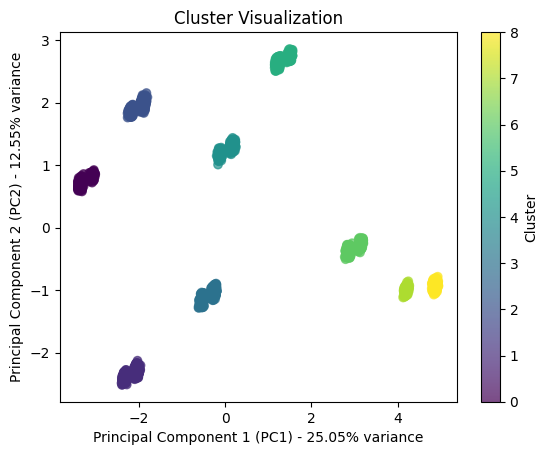

In [24]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(shopping_data)

# Visualisasi hasil clustering
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=shopping_data['Cluster'], cmap='viridis', alpha=0.7)
# Menambahkan label dengan persentase variansi
explained_variance = pca.explained_variance_ratio_ * 100
plt.xlabel(f'Principal Component 1 (PC1) - {explained_variance[0]:.2f}% variance')
plt.ylabel(f'Principal Component 2 (PC2) - {explained_variance[1]:.2f}% variance')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

- Menampilkan hasil rata-rata tiap kolom berdasarkan clusternya

In [25]:
# Analisis karakteristik tiap cluster
cluster_summary = shopping_data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
              Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
Cluster                                                                        
0       -0.007400 -0.685994        0.010996 -0.051137              -0.118959   
1       -0.040644  1.457738       -0.010995 -0.013486               0.051034   
2        0.054849 -0.685994        0.006912  0.027350              -0.008679   
3       -0.027597 -0.685994        0.021336 -0.054226               0.014540   
4       -0.002846 -0.685994       -0.087500 -0.016049               0.011971   
5       -0.059441 -0.685994        0.001911  0.003479              -0.015987   
6        0.034747 -0.685994        0.047042  0.063085               0.000318   
7       -0.042784  1.457738        0.085280 -0.018649               0.072028   
8        0.095804  1.457738       -0.018932  0.060882              -0.070491   

         Location      Size     Color    Season  Review Rating  \
Cluster                     

## **e. Analisis dan Interpretasi Hasil Cluster**

0. Cluster 0
- Demografi: Usia mendekati rata-rata dan lebih banyak laki-laki.
- Perilaku Pembelian: Frekuensi dan jumlah pembelian lebih rendah.
- Preferensi: Memilih diskon dan kode promo.

1. Cluster 1
- Demografi: Usia lebih rendah dan didominasi perempuan.
- Perilaku Pembelian: Nilai transaksi lebih tinggi dan kurang menggunakan diskon.

2. Cluster 2
- Demografi: Usia sedikit lebih tua dan didominasi laki-laki.
- Perilaku Pembelian: Pelanggan loyal dengan status langganan tinggi.

3. Cluster 3
- Demografi: Usia sedikit di bawah rata-rata.
- Perilaku Pembelian: Frekuensi pembelian sedikit lebih tinggi.

4. Cluster 4
- Review: Pemberi Rating paling rendah.

5. Cluster 5
- Demografi: Pelanggan loyal dengan status langganan tinggi.
- Perilaku Pembelian: Menggunakan diskon dengan frekuensi pembelian yang tinggi.

6. Cluster 6
- Demografi: Usia sedikit di atas rata-rata.
- Perilaku Pembelian: Nilai transaksi rata-rata mendekati nol.

7. Cluster 7
- Demografi: Lebih banyak perempuan dan belanja tergantung musim.
- Review: Pemberi Rating tertinggi.

8. Cluster 8
- Demografi: Usia lebih tinggi dan dominasi perempuan.
- Perilaku Pembelian: Nilai pembelian lebih rendah, tetapi frekuensi cukup baik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [26]:
shopping_data.to_csv("./data/shopping_data_clustering.csv", index=False)